## % Optimo para Experiencias Normalizadas

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import datetime as dt
import cx_Oracle
import csv
from matplotlib import pyplot as plt 
import seaborn as sns 

#### Analizar de un total de 69MM de experiencias, la cantidad de % de confianza para normalizar
##### las empresas mayor a un 0,5 de confianza son aproximadamente 24MM

In [3]:
#TODAS LAS EXP mayor a 0,5 son 24 millones pero se requiere distribuir por score y decidir el valor de x= score
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
ID_EXPERIENCIA
,DESC_EXPERIENCIA
,DESC_EXPERIENCIA_NORMALIZADO
,SCORE
FROM DWHPRO.EXPERIENCIAS_COMPANY_NORM
WHERE 1=1
--and score >= 0.5
'''

df = pd.read_sql_query(sql,con)

exp_df = df
df_save = df

con.close()

11.2.0.3.0


In [5]:
exp_df.shape

(40538675, 4)

In [6]:
exp_df.head()

,ID_EXPERIENCIA,DESC_EXPERIENCIA,DESC_EXPERIENCIA_NORMALIZADO,SCORE
0,194850381,Times s.a.,Time Road,0.549936
1,194850989,cmd aeropuertos canarios,Restauracion De Aeropuertos Espa?oles,0.631313
2,194854487,"Analisis y Estrategia Empresarial, S.L.",Outsourcing y Estrategia,0.543930
3,194859702,construcciones vias y equipos,Vias y Construcciones,0.715785
4,194859706,construcciones vargas,Areas,0.512821


In [7]:
exp_df.to_csv('all_exp_norm_50.csv', index= False)
#, sep=';')

In [7]:
def f_score(x):
    if x <= 0.50:
        return 10
    elif x <= 0.55:
        return 50
    elif x <= 0.60:
        return 55
    elif x <= 0.65:
        return 60
    elif x <= 0.70:
        return 65
    elif x <= 0.75:
        return 70
    elif x <= 0.80:
        return 75
    elif x <= 0.85:
        return 80
    elif x <= 0.90:
        return 85
    elif x <= 0.95:
        return 90
    elif x < 1:
        return 95
    else:
        return 100  

In [8]:
exp_df['SCORE_RANGO'] = exp_df['SCORE'].apply(lambda x: f_score(x))

In [9]:
exp_df.head()

,ID_EXPERIENCIA,DESC_EXPERIENCIA,DESC_EXPERIENCIA_NORMALIZADO,SCORE,SCORE_RANGO
0,194850381,Times s.a.,Time Road,0.549936,50
1,194850989,cmd aeropuertos canarios,Restauracion De Aeropuertos Espa?oles,0.631313,60
2,194854487,"Analisis y Estrategia Empresarial, S.L.",Outsourcing y Estrategia,0.543930,50
3,194859702,construcciones vias y equipos,Vias y Construcciones,0.715785,70
4,194859706,construcciones vargas,Areas,0.512821,50


In [10]:
# Create dataframe with exp counts by range
countbyrange = exp_df.SCORE_RANGO.value_counts()
ranges = countbyrange.index
rcount = countbyrange.values
rcount = list(rcount)
ranges = list(ranges)
countbyrange_df = pd.DataFrame( {'Range': ranges, 'Count': rcount})

In [11]:
countbyrange_df = countbyrange_df.sort_values(by ='Range').reset_index(drop=True)

In [12]:
countbyrange_df

,Range,Count
0,10,10208193
1,50,5938551
2,55,4248856
3,60,2946685
4,65,3123680
5,70,1090014
6,75,3544632
7,80,534028
8,85,22020
9,90,112


#### Distribucion por rango de SCORE

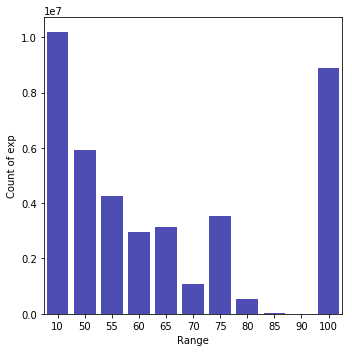

In [13]:
# Plot bar graph of review counts by month
plt.figure(figsize=(5,5))
expcounts_r = sns.barplot(countbyrange_df.Range, countbyrange_df.Count, color="blue", saturation=0.4)
expcounts_r.set(xlabel='Range', ylabel='Count of exp')
plt.tight_layout()

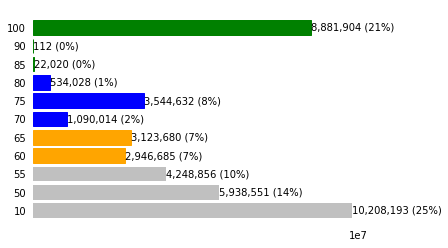

In [14]:
# Cantidad de exp en cada rango
range_counts = exp_df['SCORE_RANGO'].value_counts().sort_values()
range_counts=range_counts.sort_index()

fig, ax = plt.subplots()

bars = ax.barh(range(len(range_counts)),
              range_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(range_counts)))
ax.set_yticklabels(range_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if range_counts.index[i] in [85,90,95,100]:
            bar.set_color('green')
        if range_counts.index[i] in [70,75,80]:
            bar.set_color('blue')
        if range_counts.index[i] in [60,65]:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/range_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Generar muestra aleatoria de datos para hacer un check de la muestra

In [15]:
rows = 50

Empresas con una confianza de normalizacion entre 70 y 80%:

In [16]:
exp_df[(exp_df['SCORE']>0.7) & (exp_df['SCORE']<=0.8)].sample(rows)

,ID_EXPERIENCIA,DESC_EXPERIENCIA,DESC_EXPERIENCIA_NORMALIZADO,SCORE,SCORE_RANGO
24568179,31476652938,granier,Pans Granier,0.769231,75
1191418,12425933974,Anaya,Grupo Anaya,0.769231,75
26320034,34196235491,Grupo Telefonica,Telefonica,0.769231,75
28989850,32642586572,Expres,Boxes Expres ETT,0.769231,75
37915437,34193348390,opel auto la calzada,Opel,0.769231,75
7122331,8549972706,GARBEN,Grupo Garben,0.769231,75
34913804,34196235723,SEIDOR S.A.,Grupo Seidor,0.769231,75
28918297,30740560534,SAICA PACK SL,SAICA,0.769231,75
7007661,12897735614,McDonald's Sistemas de Espa?a,McDonald's,0.741694,70
40231749,34093486290,MARKTEL TELESERVICIOS S.L.,Marktel,0.769231,75


Empresas con una normalizacion entre un 50 y un 70%:

In [17]:
exp_df[(exp_df['SCORE']>0.5) & (exp_df['SCORE']<0.7)].sample(rows)

,ID_EXPERIENCIA,DESC_EXPERIENCIA,DESC_EXPERIENCIA_NORMALIZADO,SCORE,SCORE_RANGO
7465944,24104634296,"Talleres Arriaj, S.L. (Camargo)",Talleres de Arte Granda,0.547050,50
21888069,33804133374,Lomiton,Miton,0.549451,50
31968699,34195265594,Energia Andalucia Oriental,Fundacio Privada Valles Oriental,0.642258,60
10834691,29467034750,Cabrales mato,A Loja do Gato Preto,0.502615,50
23198448,34188617665,Atos IT,Atos,0.687420,65
17441314,22988461044,"Investigacion y tecnologia de uva de mesa, S.L.",EMESA,0.615385,60
33010039,32466169036,Sticker papeleria,Comercial del Sur de Papeleria,0.652188,65
36845659,34191655754,Paps mates,Magtel,0.512821,50
15659073,20513575824,COF DE PESCADORES DE FERROL,Ferro Spain,0.561041,55
19526593,25262696248,Barcelo hotel Asia Gardens,Barcelo Hotel Group,0.691286,65


### Conclusión

a pesar de ser muchos los datos que estamos recuperando al aumentar a un 50% no tienen sentido las normalizaciones, no hay suficientes casos que al revisar de forma manual coincidan

al subir la muestra a 80% se estan perdiendo un 10% de los datos de los cuales tenemos certeza de que una gran parte estan normalizando de manera correcta al ver la data entre 70 y 80% de confianza

In [18]:
#ID de Reviews
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
S.RATINGEVENTOBJECTTARGETID,
s.RATINGEVENTOBJECTSCORE
FROM DWHPRO.COMPANY_REVIEW s 
GROUP BY 
S.RATINGEVENTOBJECTTARGETID,
s.RATINGEVENTOBJECTSCORE
'''

df = pd.read_sql_query(sql,con)

id_df = df

con.close()

11.2.0.3.0


In [26]:
id_df.shape

(1507049, 2)

In [24]:
id_df=id_df.rename(columns={"RATINGEVENTOBJECTTARGETID": "ID_EXPERIENCIA"})

In [27]:
df_merge = exp_df.merge(id_df,how='inner',on = 'ID_EXPERIENCIA')

In [29]:
df_merge.shape

(1450630, 6)

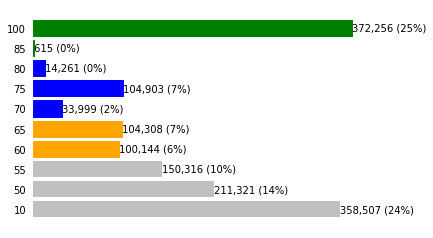

In [30]:
# Cantidad de exp en cada rango
range_counts = df_merge['SCORE_RANGO'].value_counts().sort_values()
range_counts=range_counts.sort_index()

fig, ax = plt.subplots()

bars = ax.barh(range(len(range_counts)),
              range_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(range_counts)))
ax.set_yticklabels(range_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if range_counts.index[i] in [85,90,95,100]:
            bar.set_color('green')
        if range_counts.index[i] in [70,75,80]:
            bar.set_color('blue')
        if range_counts.index[i] in [60,65]:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/range_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()